创建演示数据：

In [1]:
import numpy as np

# 坐标轴起始点
start = 0
# 坐标轴结束点
end = 6
X = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5]])
y = np.array([1598, 3898, 6220, 7799, 10510])

使用 Python 实现岭回归实现：

In [2]:
import numpy as np

def ridge(X, y, lambdas=0.1):
    """
    岭回归
    args:
        X - 训练数据集
        y - 目标标签值
        lambdas - 惩罚项系数
    return:
        W - 权重系数
    """
    return np.linalg.inv(X.T.dot(X) + lambdas * np.eye(X.shape[1])).dot(X.T).dot(y)

计算权重系数：

In [3]:
W = ridge(X, y, 0.1)
W

array([-403.90108909, 2138.99303696])

In [4]:
import numpy as np

def calcCost(X, y, W):
    return np.sum(np.square(X.dot(W) - y))

计算标准代价值：

In [5]:
calcCost(X, y, W)

234774.93790272807

可视化：

<IPython.core.display.Javascript object>


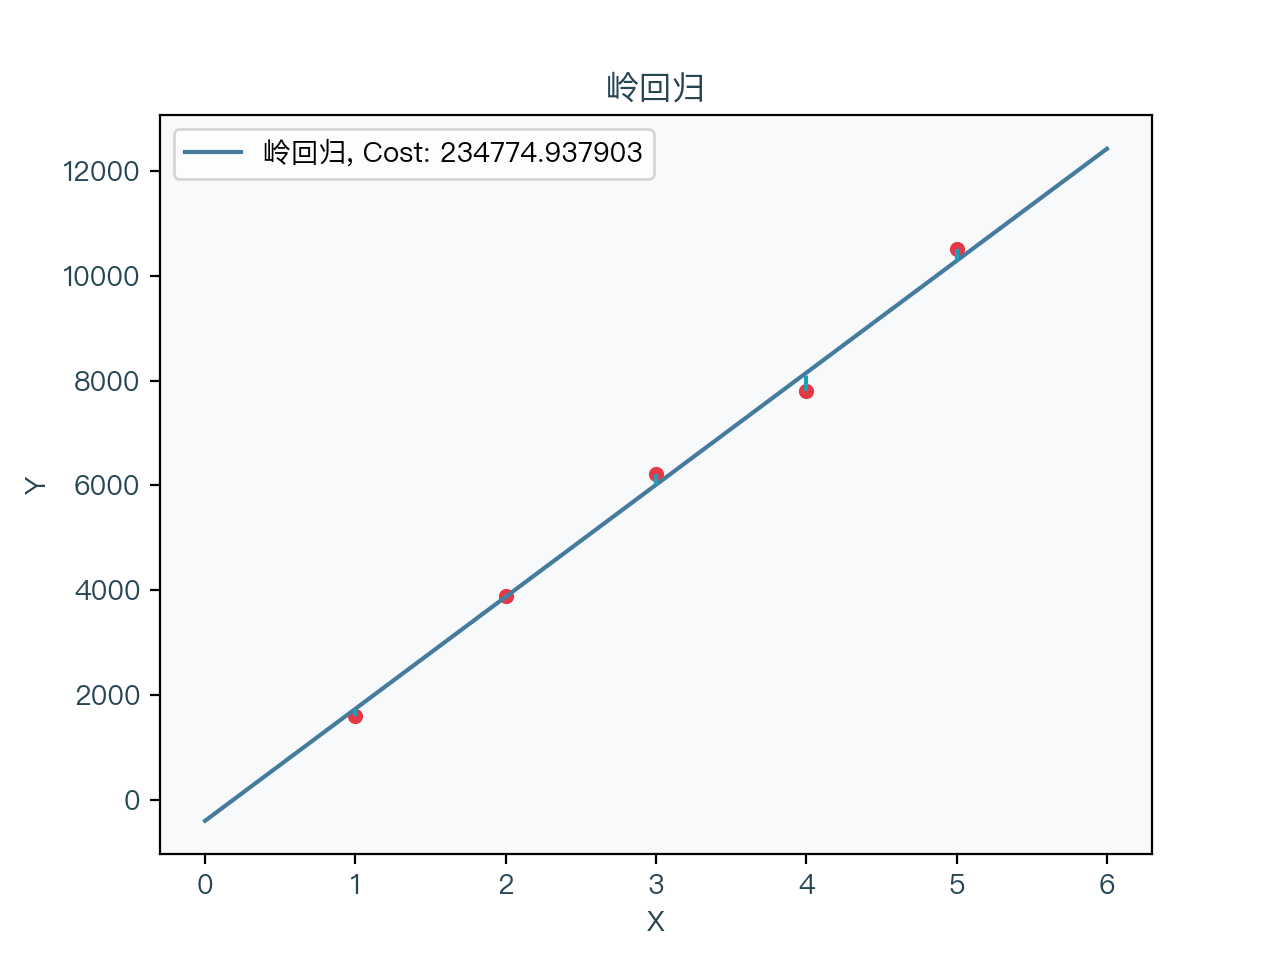

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

x1 = X[:][:, 1]
y1 = y
ax.scatter(x1, y1, marker='o', s=20, c='#e63946')
x2 = np.linspace(start, end, 100)
y2 = W[1] * x2 + W[0]
ax.plot(x2, y2, '#457b9d', label='岭回归, Cost: %f'%(calcCost(X, y, W)))
for i in range(len(x1)):
    ax.plot(np.linspace(x1[i], x1[i], 100), np.linspace(y1[i], W[1] * x1[i] + W[0], 100), '#219ebc', linestyle='--')
ax.set_title('岭回归', color='#264653')
ax.set_xlabel('X', color='#264653')
ax.set_ylabel('Y', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.legend(loc="upper left")
plt.show()

使用 scikit-learn 拟合：

In [7]:
from sklearn.linear_model import Ridge

# 初始化岭回归器
reg = Ridge(alpha=0.1, fit_intercept=False)
# 拟合线性模型
reg.fit(X, y)
# 权重系数
W = reg.coef_
W

array([-403.90108909, 2138.99303696])

可视化：

<IPython.core.display.Javascript object>


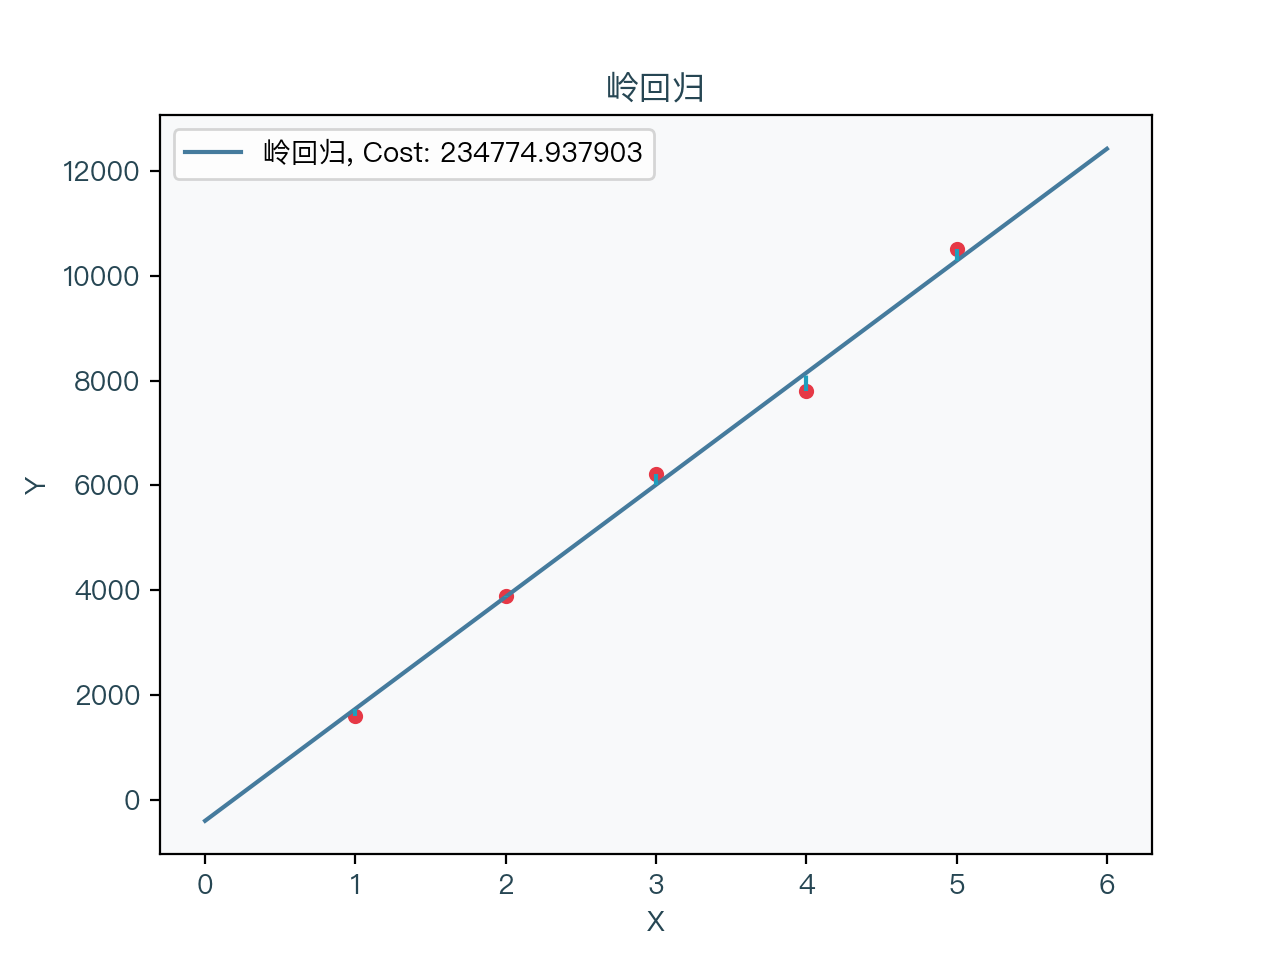

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

x1 = X[:][:, 1]
y1 = y
ax.scatter(x1, y1, marker='o', s=20, c='#e63946')
x2 = np.linspace(start, end, 100)
y2 = W[1] * x2 + W[0]
ax.plot(x2, y2, '#457b9d', label='岭回归, Cost: %f'%(calcCost(X, y, W)))
for i in range(len(x1)):
    ax.plot(np.linspace(x1[i], x1[i], 100), np.linspace(y1[i], W[1] * x1[i] + W[0], 100), '#219ebc', linestyle='--')
ax.set_title('岭回归', color='#264653')
ax.set_xlabel('X', color='#264653')
ax.set_ylabel('Y', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.legend(loc="upper left")
plt.show()

λ 对权重系数的影响：

<IPython.core.display.Javascript object>


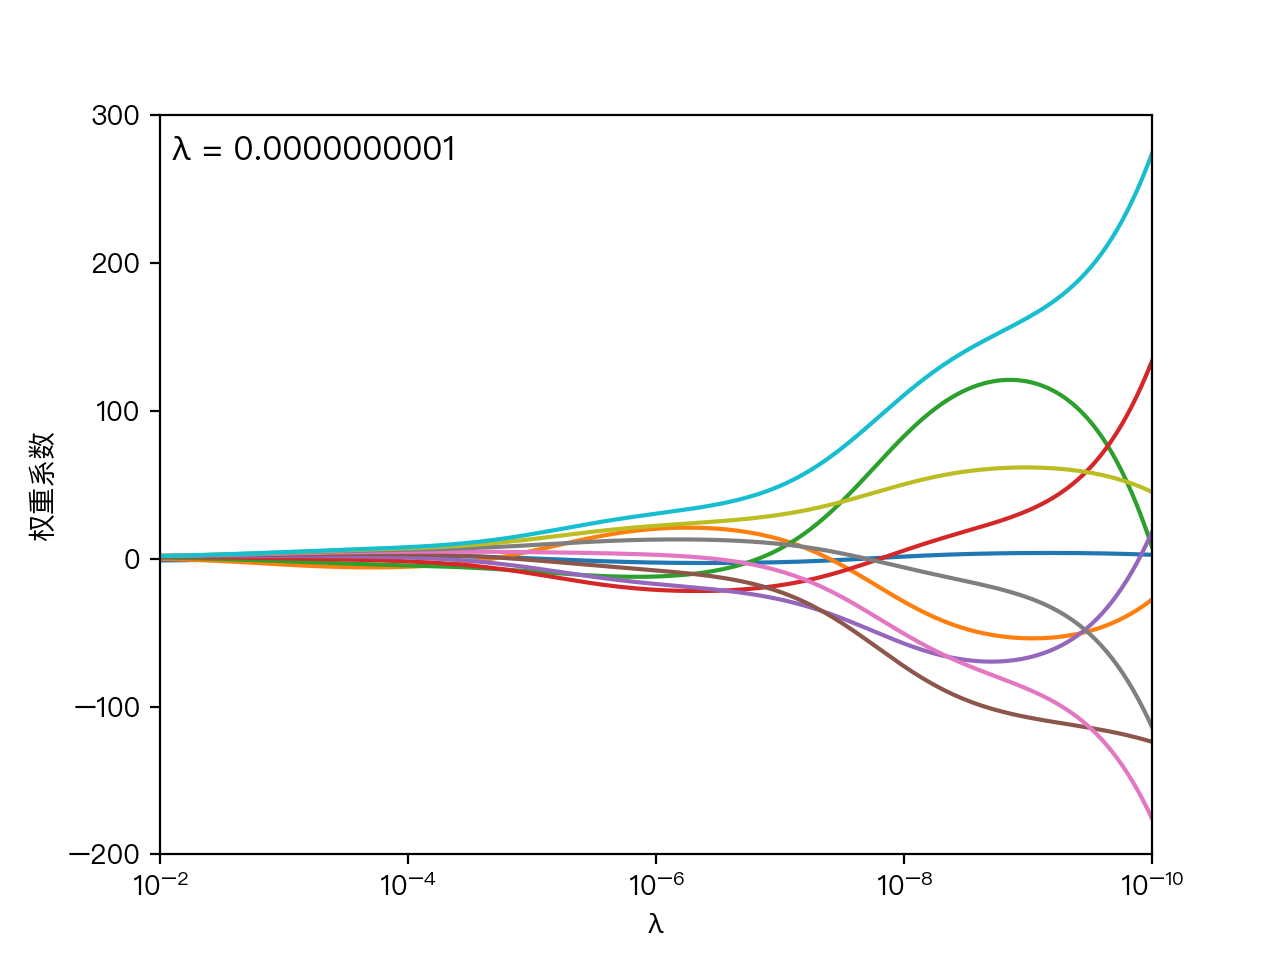

In [9]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause
# Source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn import linear_model

%matplotlib notebook

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

fig, ax = plt.subplots()
xdatas, ydatas = [], []
lns = []
text = plt.text(0.008, 270, '', fontsize=12)
for i in range(0, 10):
    xdatas.append([])
    ydatas.append([])
    ln, = ax.plot([], [])
    lns.append(ln)

def init():
    ax.set_xlim(alphas[0] , alphas[len(alphas) - 1])
    ax.set_ylim(-200, 300)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    return lns

def update(i):
    for j in range(0, 10):
        xdatas[j].append(alphas[i])
        ydatas[j].append(coefs[i][j])
        lns[j].set_data(xdatas[j], ydatas[j])
    text.set_text("λ = %.10f"%(alphas[i]))
    return lns

ani = animation.FuncAnimation(fig, update, frames = range(len(alphas) - 1, -1, -1), init_func=init, interval=50, blit=True, repeat=False)
# ani.save('ridge.gif')
plt.xlabel('λ')
plt.ylabel('权重系数')
plt.axis('tight')
plt.show()